In [8]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse_drug = pd.read_csv(mouse_drug_data_to_load)
df_clinical_trial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
df_merged_mdrug_ctrial = pd.merge(df_clinical_trial, df_mouse_drug, how='left', on='Mouse ID')


# Display the data table for preview
df_merged_mdrug_ctrial.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [9]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [10]:
grouped_drug_timepoint = df_merged_mdrug_ctrial.groupby(['Drug','Timepoint'])

df_drug_timepoint_mean = pd.DataFrame({'Tumor Volume (mm3)':grouped_drug_timepoint['Tumor Volume (mm3)'].mean()}).reset_index()

df_drug_timepoint_mean.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [11]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
grouped_drug_timepoint = df_merged_mdrug_ctrial.groupby(['Drug','Timepoint'])

df_drug_timepoint_sem = pd.DataFrame({'Tumor Volume (mm3)':grouped_drug_timepoint['Tumor Volume (mm3)'].sem() }).reset_index()

df_drug_timepoint_sem.head()
#df_drug_timepoint_sem.loc[df_drug_timepoint_sem['Drug']=='Capomulin', 'Tumor Volume (mm3)']

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [12]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
df_drug_timepoint_mean_reformat = df_drug_timepoint_mean.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
df_drug_timepoint_mean_reformat

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


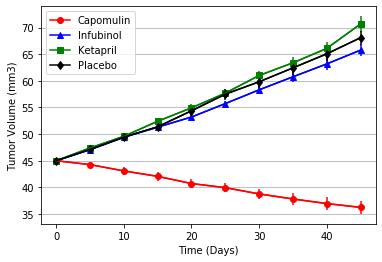

In [26]:
# Generate the Plot (with Error Bars)

fig, ax = plt.subplots()

sem_capomulin = df_drug_timepoint_sem.loc[df_drug_timepoint_sem['Drug']=='Capomulin', 'Tumor Volume (mm3)']
sem_infubinol = df_drug_timepoint_sem.loc[df_drug_timepoint_sem['Drug']=='Infubinol', 'Tumor Volume (mm3)']
sem_ketapril = df_drug_timepoint_sem.loc[df_drug_timepoint_sem['Drug']=='Ketapril', 'Tumor Volume (mm3)']
sem_placebo = df_drug_timepoint_sem.loc[df_drug_timepoint_sem['Drug']=='Placebo', 'Tumor Volume (mm3)']

ax.errorbar(df_drug_timepoint_mean_reformat.index,df_drug_timepoint_mean_reformat['Capomulin'],sem_capomulin, color='red')
ax.errorbar(df_drug_timepoint_mean_reformat.index,df_drug_timepoint_mean_reformat['Infubinol'],sem_infubinol, color='blue')
ax.errorbar(df_drug_timepoint_mean_reformat.index,df_drug_timepoint_mean_reformat['Ketapril'],sem_ketapril, color='green')
ax.errorbar(df_drug_timepoint_mean_reformat.index,df_drug_timepoint_mean_reformat['Placebo'],sem_placebo, color='black')

ax.plot(df_drug_timepoint_mean_reformat.index,df_drug_timepoint_mean_reformat['Capomulin'],color='red',label='Capomulin', marker='o')
ax.plot(df_drug_timepoint_mean_reformat.index,df_drug_timepoint_mean_reformat['Infubinol'], color='blue', label='Infubinol', marker='^')
ax.plot(df_drug_timepoint_mean_reformat.index,df_drug_timepoint_mean_reformat['Ketapril'], color='green', label='Ketapril', marker='s')
ax.plot(df_drug_timepoint_mean_reformat.index,df_drug_timepoint_mean_reformat['Placebo'], color='black', label='Placebo', marker='d')

#capomulin_tp, = plt.plot(df_drug_timepoint_mean_reformat.index,df_drug_timepoint_mean_reformat['Capomulin'],color='red',label='Capomulin', marker='o')
#infubinol_tp, = plt.plot(df_drug_timepoint_mean_reformat.index,df_drug_timepoint_mean_reformat['Infubinol'], color='blue', label='Infubinol', marker='^')
#ketapril_tp, = plt.plot(df_drug_timepoint_mean_reformat.index,df_drug_timepoint_mean_reformat['Ketapril'], color='green', label='Ketapril', marker='s')
#placebo_tp, = plt.plot(df_drug_timepoint_mean_reformat.index,df_drug_timepoint_mean_reformat['Placebo'], color='black', label='Placebo', marker='d')

#capomulin_tp.axes.errorbar(df_drug_timepoint_mean_reformat.index,df_drug_timepoint_mean_reformat['Capomulin'],sem_capomulin, color='red')
#infubinol_tp.axes.errorbar(df_drug_timepoint_mean_reformat.index,df_drug_timepoint_mean_reformat['Infubinol'],sem_infubinol, color='blue')
#ketapril_tp.axes.errorbar(df_drug_timepoint_mean_reformat.index,df_drug_timepoint_mean_reformat['Ketapril'],sem_ketapril, color='green')
#placebo_tp.axes.errorbar(df_drug_timepoint_mean_reformat.index,df_drug_timepoint_mean_reformat['Placebo'],sem_placebo, color='black')


#plt.legend(loc='best')
ax.legend(loc='best')
#plt.xlabel('Time (Days)')
ax.set_xlabel('Time (Days)')
#plt.ylabel('Tumor Volume (mm3)')
ax.set_ylabel('Tumor Volume (mm3)')


ax.yaxis.grid()
# Save the Figure
#plt.savefig('Images/plt_treatment.png')
fig.savefig('Images/plt_treatment.png')

plt.show()


In [25]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)